#Analysis on House Price Prediction Dataset.

####**Column Details**:
* **House Size(sqft)**: Represents the size of house based on square feet.
* **Bedrooms**: Represents the number of bedrooms present in the house.
* **Location**: Tells the area where the house is located.
* **Price**: The overall cost of the house (also the target variable)

In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the given dataset
df = pd.read_csv("/content/house_prices.csv")
df.head()

,House Size (sqft),Bedrooms,Location,Price
0,3974,3,Countryside,256730
1,1660,5,Countryside,970910
2,2094,2,Downtown,484681
3,1930,4,Suburb,249503
4,1895,2,Countryside,754811


In [3]:
df.shape

(15, 4)

We have around 15 rows and 4 columns, seems like we have a shortage on data points.

In [4]:
# Let's understand the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   House Size (sqft)  15 non-null     int64 
 1   Bedrooms           15 non-null     int64 
 2   Location           15 non-null     object
 3   Price              15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 612.0+ bytes


* Apprantly we have only one object column and around 3 numerical column.
* It appears all of the columns are in their proper data types.
* There doesn't seems to be any null values either.

In [5]:
# Let's confirm if there is any null values in the dataset
# Let's check for any duplicated rows
print("Null Values: ",df.isnull().sum().sum())
print("Duplicated Values: ",df.duplicated().sum())

Null Values:  0
Duplicated Values:  0


* No Null Values.
* No duplicates either.

In [6]:
df.describe()

,House Size (sqft),Bedrooms,Price
count,15.000000,15.000000,15.000000
mean,2546.200000,3.066667,494671.866667
std,976.990291,1.486447,245766.889568
min,1130.000000,1.000000,165725.000000
25%,1912.500000,2.000000,253116.500000
50%,2282.000000,3.000000,484681.000000
75%,3344.000000,4.000000,673781.000000
max,3974.000000,5.000000,970910.000000


* We can see ther is heavy variation on all of the columns

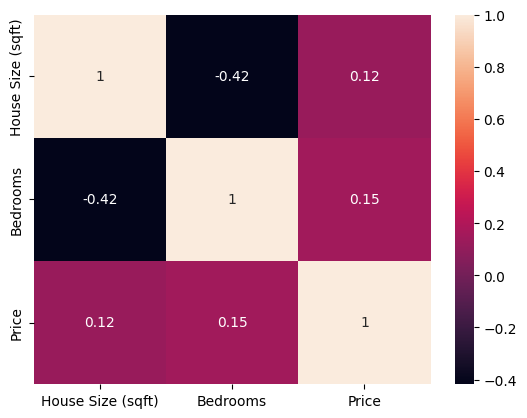

In [7]:
# Let's find the correlation of all the numerical variables
sns.heatmap(df.corr(numeric_only=True), annot=True, cbar=True)
plt.show()

* We can see Bedrooms colum is negatively correlated.
* Also other columns seems to be positively correlated.
* But no column is higly correlated so we can retain all the given columns.

In [8]:
# Let's explore the only categorcial column Location
print("Unique Locations: ", df['Location'].unique())

Unique Locations:  ['Countryside' 'Downtown' 'Suburb']


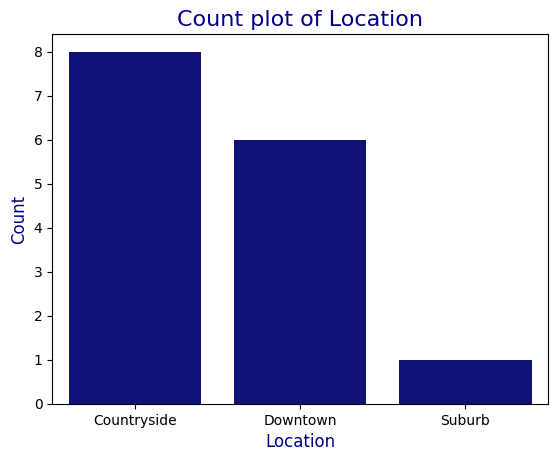

In [9]:
plt.title("Count plot of Location", size=16, color='darkblue')
sns.countplot(x = df['Location'], color='darkblue')
plt.xlabel("Location", size=12, color="darkblue")
plt.ylabel("Count", size=12, color="darkblue")
plt.show()

* We can see most of the houses are located at Countryside.
* We can observe only one house located at Suburb.

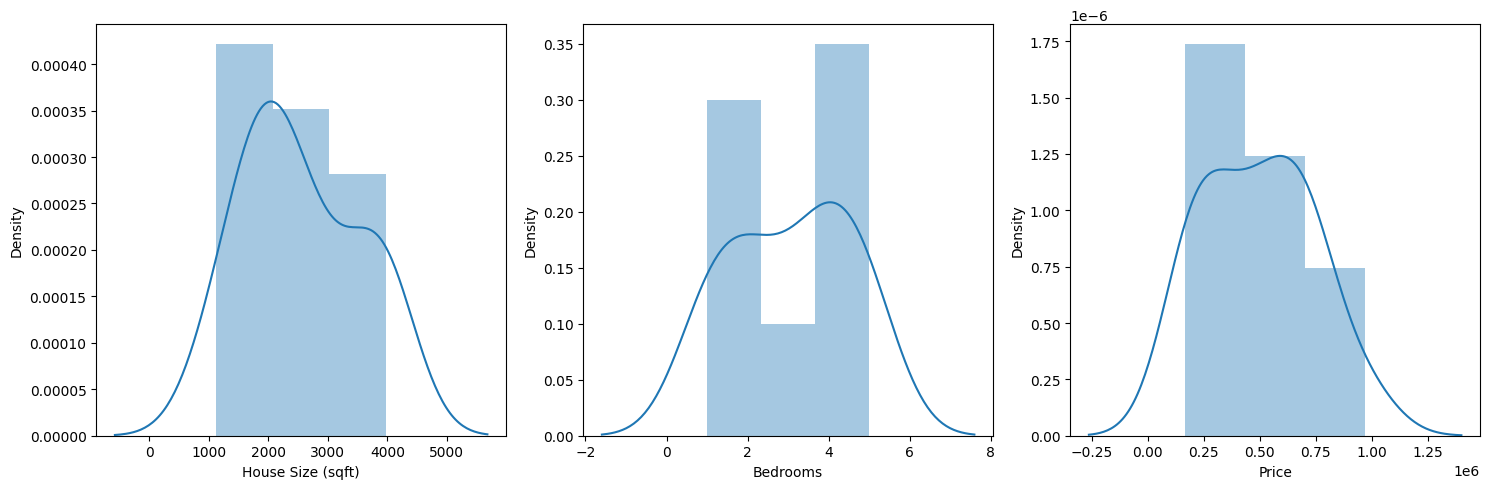

In [10]:
# Now let's explore all the numerical columns
# let's understand the data distribution of all the numerical columns

plt.figure(figsize=(15, 5))
i = 0
for col in ['House Size (sqft)', 'Bedrooms', 'Price']:
    i += 1
    plt.subplot(1, 3, i)
    sns.distplot(df[col])
    plt.tight_layout()
plt.show()

* We can see the House Size is in the range of 1000-4000 approximately.
* Bedrooms are in the range [1-5] also most of the houses has 4-5 bedrooms in the dataset.


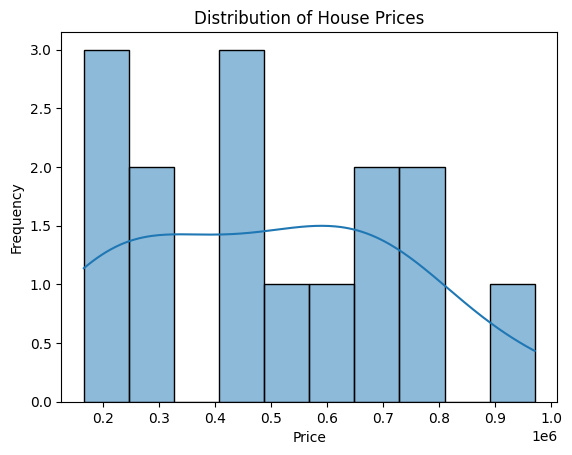

In [11]:
# Let's analyze Price column in more detail
sns.histplot(df['Price'], bins=10, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

The data is distributed widely there doesn't seem to by any particular pattern here.

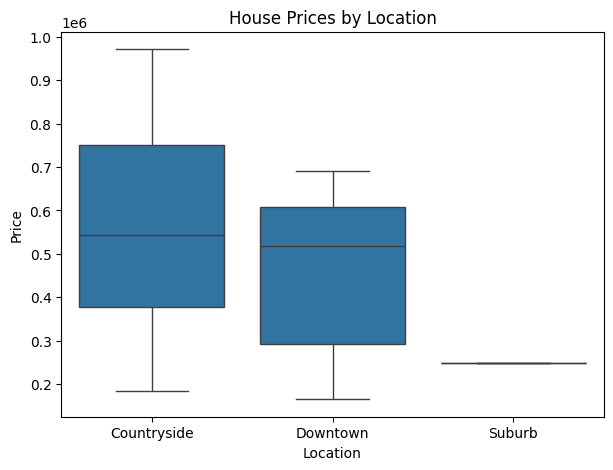

In [12]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Location', y='Price', data=df)
plt.title("House Prices by Location")
plt.xlabel("Location")
plt.ylabel("Price")
plt.show()

We can see most of the Price is distributed among Countryside and Downtown and hardly any towards Suburb which is kind of obvious because we have only one data point related to Suburb.

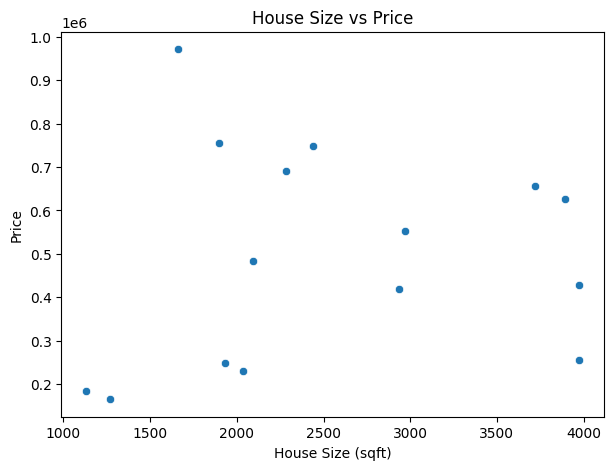

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='House Size (sqft)', y='Price', data=df)
plt.title("House Size vs Price")
plt.xlabel("House Size (sqft)")
plt.ylabel("Price")
plt.show()

There doesn't seem to be any particular relation among House Size and Price.

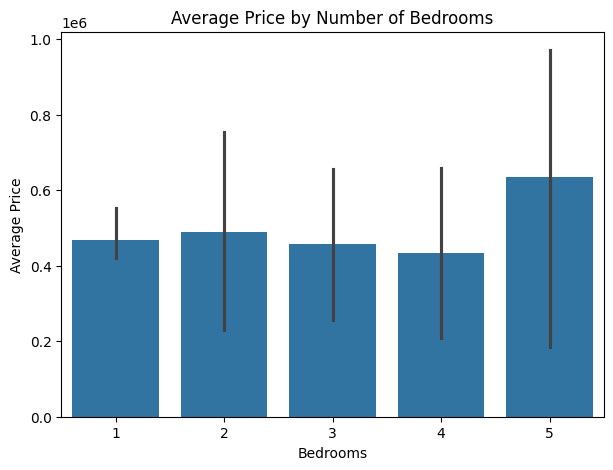

In [14]:
plt.figure(figsize=(7,5))
sns.barplot(x='Bedrooms', y='Price', data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Average Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price")
plt.show()

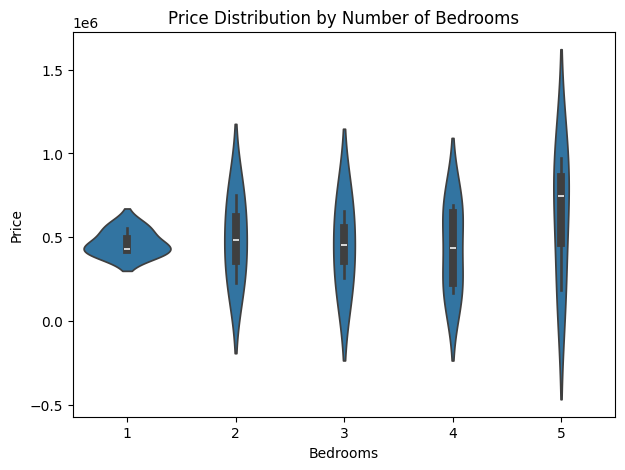

In [15]:
plt.figure(figsize=(7,5))
sns.violinplot(x='Bedrooms', y='Price', data=df)
plt.title("Price Distribution by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

From these charts
* It is clear that houses with 1 Bedroom is the chepest and houses with 5 bedrooms are the costliest.
* We can also see that there is no clear hierarchy for 2, 3 or 4 bedrooms so we can infer from this that bedrooms are not the only factor that influence the price of the house.

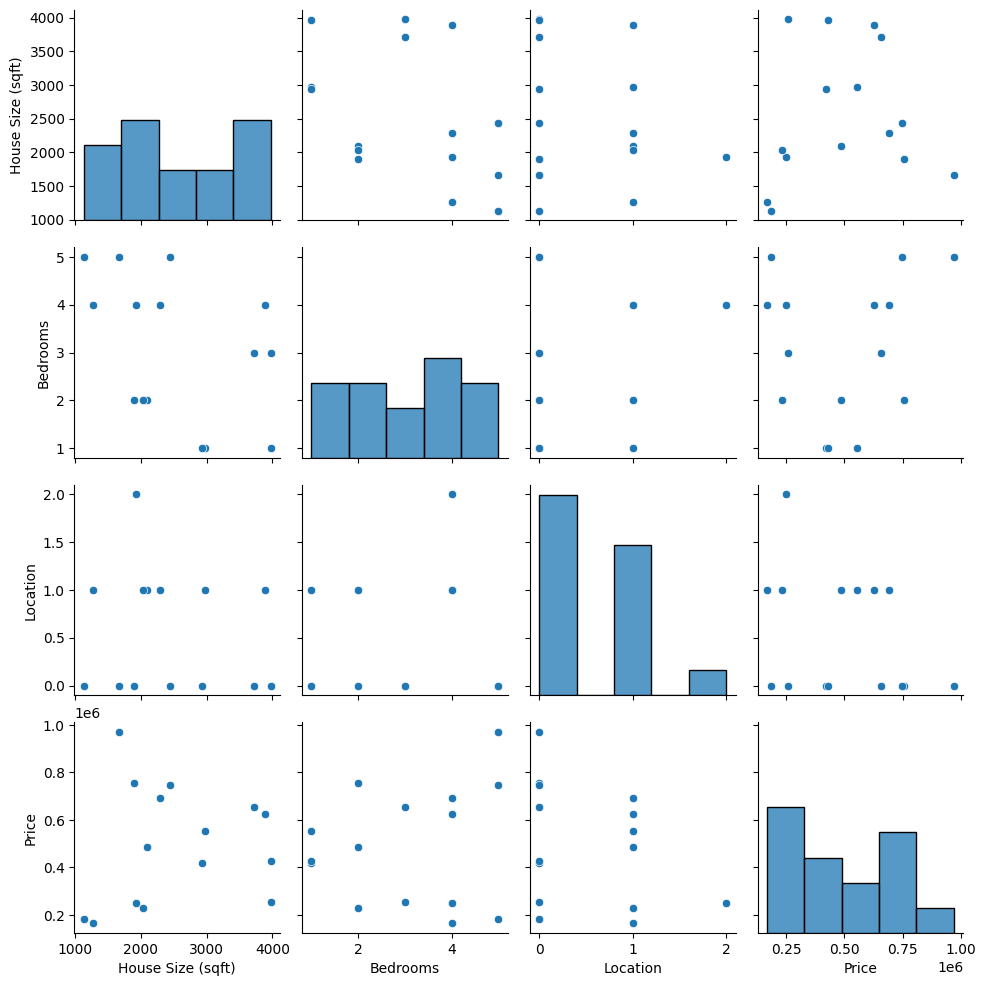

In [36]:
sns.pairplot(df)

* We can see some linear relation but apart from that there isn't anything specific here.

# Data Pre-processing

In [16]:
# Converting categorical column into numerical column using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])

In [17]:
#Feature Selection
x = df.drop('Price', axis=1)         # features
y = df['Price']                      # Target

In [18]:
# splitting the data for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12, 3), (3, 3), (12,), (3,))

In [22]:
# Let's scale our data using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Building

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [26]:
# model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
y_pred = model.predict(x_train_scaled)

# Evaluation Metrics
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = root_mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
# Display all metrics
print("Model Evaluation on Training dataset:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")

Model Evaluation on Training dataset:
MAE: 159706.1062
MSE: 38962792872.3317
RMSE: 197389.9513
R^2: 0.3529


In [28]:
y_pred_test = model.predict(x_test_scaled)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
# Display all metrics
print("Model Evaluation on Testing dataset:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")

Model Evaluation on Training dataset:
MAE: 290075.8561
MSE: 129043035971.4246
RMSE: 359225.6060
R^2: -9.1246


In [32]:
# implementing hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
model = Ridge()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train_scaled, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_train_scaled)

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = root_mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
# Display all metrics
print("Model Evaluation on Testing dataset:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")

Model Evaluation on Testing dataset:
MAE: 159714.6653
MSE: 38962807745.3606
RMSE: 197389.9890
R^2: 0.3529


# Insights and Interpretation

* From all those metrics we can infer that our model is not performing that well.
* It is probably due to lack of data
* Even after implementing hyperparmeter tuning we could not see any major difference in the the r2_score
* We are also missing a lot of important features as well, for example to decide worth of a house there are also a lot other factors involved as well like closeness to city and many more.

---

* Based on EDA we found out that
  * df.shape is used, the dataset's size was analyzed.

  * Visualizations using Seaborn and Matplotlib for trends in pricing.

* Feature Importance & Correlation

  * .corr() used for correlation analysis.

* Model Evaluation

 * Calculated MAE, RMSE, and R² for regression models.

 * Hyperparameter tuning is done on Lasso model but there wasn't any major difference noticed.